In [1]:
# move data file to data directory

import os, glob, shutil
# if not os.path.exists('./data'):
#     os.mkdir('./data')
for f in glob.glob('./*.txt') + glob.glob('./*.csv'):
    shutil.move(f, './data/')
print("Data moved!")

Data moved!


In [2]:
# acount metadata

AZURE_SUBSCRIPTION_ID = 'ef3e36f3-4579-469d-b38e-9812ed58ed4f'
ML_WORKSPACE_NAME = 'dairyDemo'
AZURE_IOT_HUB_NAME = 'dairyFarm'
RESOURCE_GROUP_NAME = 'IoTEdgeResources'
LOCATION = 'West US 2'
STORAGE_ACCOUNT_NAME = 'dairydatastorage'
STORAGE_ACCOUNT_KEY = 'oJ7P/zbnlwzxGHNTVar6eaEU9ZAk+gvM3YrPRKeqZAU5ymrMH4yilNkQP6baAoNi28yi9SwcWCMavRPGIb2phw=='
STORAGE_ACCOUNT_CONTAINER = 'dairydata'
DATASTORE_NAME = 'dairydata'

In [3]:
## Configue workspace
# from azureml.core.workspace import Workspace
# ws = Workspace.from_config()
import os, glob, shutil
from azureml.core import Workspace
workspace_name = ML_WORKSPACE_NAME
subscription_id = AZURE_SUBSCRIPTION_ID
resource_group = RESOURCE_GROUP_NAME
location = LOCATION

if not os.path.exists('./aml_config'):
    os.mkdir('./aml_config')
ws = Workspace.from_config()
# ws = Workspace.create(name=workspace_name,
#                           subscription_id=subscription_id,
#                           resource_group=resource_group,
#                           create_resource_group=True,
#                           location=location
#                          )

# #check to see if the workspace has already been created and persisted
# if (os.path.exists('./aml_config/config.json')):
#     print("here")
    
# else:
#     ws = Workspace.create(name=workspace_name,
#                           subscription_id=subscription_id,
#                           resource_group=resource_group,
#                           create_resource_group=True,
#                           location=location
#                          )

#     ws.write_config(path='./aml_config')


In [4]:
## print workspace detail

import azureml.core
import pandas as pd
from azureml.core import Workspace

output = {}
output['SDK version'] = azureml.core.VERSION
output['Subscription ID'] = ws.subscription_id
output['Workspace'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(data=output, index=['']).T

,
SDK version,1.0.72
Subscription ID,ef3e36f3-4579-469d-b38e-9812ed58ed4f
Workspace,dairyDemo
Resource Group,IoTEdgeResources
Location,westus2


In [5]:
## retrieve data from datastore, create TabularDataset 
from azureml.core import Datastore, Workspace, Datastore, Dataset

datastore_name = DATASTORE_NAME
datastore = Datastore.get(ws, datastore_name)
label_datastore_path = (datastore,'/label_data_large.csv')
label_dataset = Dataset.Tabular.from_delimited_files(path=label_datastore_path)

record_datastore_path_old = (datastore,'/record_data_large.csv')
record_dataset_old = Dataset.Tabular.from_delimited_files(path=record_datastore_path_old)
record_datastore_path = (datastore,'/dairy_milk_daily_data.csv')
record_dataset = Dataset.Tabular.from_delimited_files(path=record_datastore_path)

print("Data retrieved!")

Data retrieved!


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/azureml/data/dataset_factory.py:227: UserWarning: Ambiguous datetime formats inferred for columns ['datesql'] are resolved as "month-day". Desired format can be specified by `set_column_types`.
  .format(column_types_builder.ambiguous_date_columns))


In [6]:
## transform the data from Tabular to pandas
label_data = label_dataset.to_pandas_dataframe()
record_data = record_dataset.to_pandas_dataframe()
print("Data Transformed!")

# label_data.head(10)
# record_data.head(10)

Data Transformed!


## Data Analysis 

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(label_data.head(1))
print(record_data.head(1))

   ID  LACT        Event  DIM       Date            Remark   R  T     B
0  1   3     BRED         92  2018-09-04  7H14124           P   7  None
     datesql  Animal_ID  Group_ID  Lactation_Num  DIM AnimalStatus  \
0 2018-01-03  1          11        2              306  Dry           

  Gynecology_Status  Yield(gr)  ProdRate(gr/hr)  Fat(%)  Avg_Fat(%)  \
0  Pregnant          0.0        0.0              0.0     0.0          

   Protein(%)  Avg_Protein(%)  Lactose  Avg_Lactose(%)  Conductivity  \
0  0.0         0.0             0.0      0.0             0.0            

   Avg_Conductivity  Blood(%)  Avg_Blood(%)  Milking_Time(seconds)  \
0  0.0               0.0       0.0           0.0                     

   Avg_Milking_Time(seconds)  SCC(*1000/ml)  Avg_SCC(*1000/ml)  \
0  0.0                        0.0            0.0                 

   Activity(steps/hr)  ActivityDeviation(%)  RestBout(#)  RestPerBout(min)  \
0  95.0               -1.0                   10.0         90.0             

### Features range and distribution

In [8]:
# find unique values:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

In [9]:
from pandas import DataFrame as df

# statistics analysis
def plot(checking_cols,rows,cols=2):
    for col in checking_cols:
        print(col,': ',' max:',max(record_data[col]),' min:',min(record_data[col]),' nonEmpty %:',round(np.count_nonzero(col)/len(col),2))
    (df.hist(record_data,checking_cols, figsize=[4*cols,4*rows],layout=(rows,cols)))

In [10]:
## general columns
checking_cols1 = ['Lactation_Num','DIM',
                 'Activity(steps/hr)','ActivityDeviation(%)',
                'Yield(gr)','ProdRate(gr/hr)',
                 'Fat(%)','Avg_Fat(%)',
                 'Protein(%)','Avg_Protein(%)',
                 'Lactose','Avg_Lactose(%)']
plot(checking_cols1,6)

Lactation_Num :   max: 8  min: 0  nonEmpty %: 0.08
DIM :   max: 754  min: 0  nonEmpty %: 0.33
Activity(steps/hr) :   max: 1000.0  min: 0.0  nonEmpty %: 0.06
ActivityDeviation(%) :   max: 993.0  min: -100.0  nonEmpty %: 0.05
Yield(gr) :   max: 98309.0  min: 0.0  nonEmpty %: 0.11
ProdRate(gr/hr) :   max: 4096.0  min: 0.0  nonEmpty %: 0.07
Fat(%) :   max: 7.0  min: 0.0  nonEmpty %: 0.17
Avg_Fat(%) :   max: 6.0  min: 0.0  nonEmpty %: 0.1
Protein(%) :   max: 4.0  min: 0.0  nonEmpty %: 0.1
Avg_Protein(%) :   max: 4.0  min: 0.0  nonEmpty %: 0.07
Lactose :   max: 5.0  min: 0.0  nonEmpty %: 0.14
Avg_Lactose(%) :   max: 5.0  min: 0.0  nonEmpty %: 0.07


Conductivity :   max: 20.0  min: 0.0  nonEmpty %: 0.08
Avg_Conductivity :   max: 15.8  min: 0.0  nonEmpty %: 0.06
Blood(%) :   max: 1.0  min: 0.0  nonEmpty %: 0.12
Avg_Blood(%) :   max: 0.0  min: 0.0  nonEmpty %: 0.08
Milking_Time(seconds) :   max: 2804.0  min: 0.0  nonEmpty %: 0.05
Avg_Milking_Time(seconds) :   max: 586.0  min: 0.0  nonEmpty %: 0.04
SCC(*1000/ml) :   max: 2142892219.0  min: 0.0  nonEmpty %: 0.08
Avg_SCC(*1000/ml) :   max: 933159144.0  min: 0.0  nonEmpty %: 0.06
Activity(steps/hr) :   max: 1000.0  min: 0.0  nonEmpty %: 0.06
ActivityDeviation(%) :   max: 993.0  min: -100.0  nonEmpty %: 0.05
RestBout(#) :   max: 492.0  min: -1.0  nonEmpty %: 0.09
RestRatio(%) :   max: 100.0  min: -1.0  nonEmpty %: 0.08
RestRestlessness :   max: 2853.0  min: -1.0  nonEmpty %: 0.06
RestTime(min) :   max: 1556.0  min: -1.0  nonEmpty %: 0.08
Weight(gr) :   max: 1000000.0  min: 0.0  nonEmpty %: 0.1


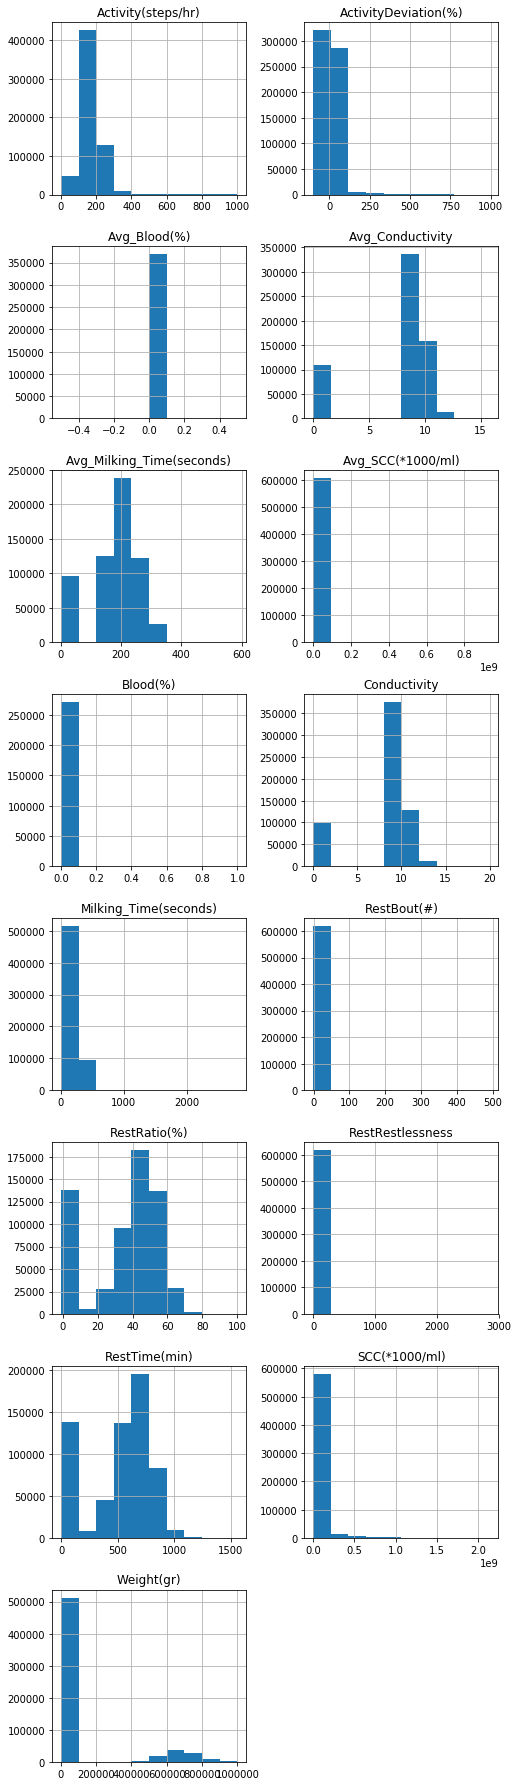

In [11]:
# general distribution
checking_cols2 = ['Conductivity','Avg_Conductivity',
                  'Blood(%)','Avg_Blood(%)',
                  'Milking_Time(seconds)','Avg_Milking_Time(seconds)',
                 'SCC(*1000/ml)','Avg_SCC(*1000/ml)',
                  'Activity(steps/hr)','ActivityDeviation(%)',
                  'RestBout(#)','RestRatio(%)',
                  'RestRestlessness','RestTime(min)',
                  'Weight(gr)'
                 ]
plot(checking_cols2,8)

### columns with abnormals
#### 1. higher than extreme values

In [ ]:
checking_ab_cols1 = ['Activity(steps/hr)','ActivityDeviation(%)']
plot(checking_ab_cols1,2,cols=2)
checking_ab_cols2 =['Yield(gr)','ProdRate(gr/hr)']
plot(checking_ab_cols2,2,cols=2)

In [ ]:
## columns with abnormals
# higher than extreme values
checking_ab_cols1 = ['Activity(steps/hr)','ActivityDeviation(%)']
plot(checking_ab_cols1,2,cols=2)
checking_ab_cols2 =['Yield(gr)','ProdRate(gr/hr)']
plot(checking_ab_cols2,2,cols=2)

### columns with abnormals
#### 2. negative values

In [ ]:
checking_ab_cols1 = ['RestBout(#)','RestRatio(%)',
                  'RestRestlessness','RestTime(min)']
plot(checking_ab_cols1,2,cols=2)

### columns with abnormals
#### 3. non-numerical

In [ ]:
print("AnimalStaus",np.unique(record_data[['AnimalStatus']].values))
print("Gynecology_Status",np.unique(record_data[['Gynecology_Status']].values))

### correlation and feature choosing

In [ ]:
dif_features = [[]]
corr= dif_features.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dif_features.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dif_features.columns)
ax.set_yticklabels(dif_features.columns)
plt.savefig('correlation_matrix.png')
plt.show()

## Data Preprocessing

### 1. categorical data-> numerical 

In [12]:
cleanup_nums = {"AnimalStatus":{"Dry":0,"Milk":1}}
record_data.replace(cleanup_nums, inplace=True)
record_data.head()

## one-hot encoding
label_encoder = LabelBinarizer()
transformed =label_encoder.fit_transform(record_data["Gynecology_Status"])
ohe_df = pd.DataFrame(transformed, columns = ['Abortion', 'Fresh (Calving)', 'Heat', 'Insemination', 'Not for Insemination','Pregnant'])
transformed_data = pd.concat([record_data, ohe_df], axis=1).drop(["Gynecology_Status"], axis=1)



In [13]:
transformed_data.head()

,datesql,Animal_ID,Group_ID,Lactation_Num,DIM,AnimalStatus,Yield(gr),ProdRate(gr/hr),Fat(%),Avg_Fat(%),Protein(%),Avg_Protein(%),Lactose,Avg_Lactose(%),Conductivity,Avg_Conductivity,Blood(%),Avg_Blood(%),Milking_Time(seconds),Avg_Milking_Time(seconds),SCC(*1000/ml),Avg_SCC(*1000/ml),Activity(steps/hr),ActivityDeviation(%),RestBout(#),RestPerBout(min),RestRatio(%),RestRestlessness,RestTime(min),Weight(gr),Abortion,Fresh (Calving),Heat,Insemination,Not for Insemination,Pregnant
0,2018-01-03,1,11,2,306,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,-1.0,10.0,90.0,64.0,9.0,904.0,0.0,0,0,0,0,0,1
1,2018-01-03,2,8,1,262,1,33299.0,1387.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,8.7,0.0,0.0,167.0,154.0,0.0,0.0,166.0,13.0,8.0,86.0,49.0,22.0,688.0,0.0,0,0,0,0,0,1
2,2018-01-03,3,6,1,152,1,38277.0,1594.0,0.0,0.0,0.0,0.0,0.0,0.0,9.1,9.0,0.0,0.0,171.0,170.0,0.0,0.0,163.0,18.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0,0,0,0,0,1
3,2018-01-03,10,5,2,44,1,62632.0,2609.0,0.0,0.0,0.0,0.0,0.0,0.0,9.1,8.9,0.0,0.0,257.0,268.0,0.0,0.0,214.0,13.0,10.0,54.0,39.0,42.0,535.0,0.0,0,0,1,0,0,0
4,2018-01-03,18,22,2,118,1,39295.0,1637.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,8.9,0.0,0.0,272.0,239.0,0.0,0.0,154.0,45.0,11.0,73.0,54.0,19.0,799.0,0.0,0,0,0,0,0,1


###  2. Selected Columns

In [14]:

# useful columns
cow_cols = ["datesql",  "Animal_ID"]
## note the last few cols are one-hot encoding of "Gynecology_Status" : ['Abortion', 'Fresh (Calving)', 'Heat', 'Insemination', 'Not for Insemination','Pregnant']
health_cols = ['Blood(%)','Avg_Milking_Time(seconds)','RestBout(#)','RestRatio(%)','RestTime(min)','Weight(gr)',"AnimalStatus",'Abortion', 'Fresh (Calving)', 'Heat', 'Insemination', 'Not for Insemination','Pregnant']
activity_cols =['Activity(steps/hr)','ActivityDeviation(%)']
milk_cols = ['Protein(%)',"Fat(%)",'Lactose','Conductivity']

In [28]:
## choosing sub-columns to use
RECORD_COLUMNS_COWS=cow_cols
RECORD_COLUMNS_ACTIVITY = activity_cols
RECORD_COLUMNS_MILK = milk_cols
RECORD_COLUMNS_HEALTH = health_cols

LABEL_COLUMNS = ['ID','Date','R','Event']
rd = transformed_data[RECORD_COLUMNS_COWS+RECORD_COLUMNS_ACTIVITY + RECORD_COLUMNS_MILK+RECORD_COLUMNS_HEALTH]
ld = label_data[LABEL_COLUMNS]
ld.columns=["Animal_ID","datesql",'R','Event']

print("Unused columns removed!")

Unused columns removed!


In [29]:
## Remove rows with empty values
print(rd.shape)
print(ld.shape)

rd = rd.dropna()
ld = ld.dropna()

print(rd.shape)
print(ld.shape)

(618935, 21)
(2584, 4)
(53543, 21)
(2584, 4)


In [37]:
## Generate "estrus date" column
rd["IsEstrus"] = 0

full_data = pd.merge(rd, ld, how='left', on=["Animal_ID","datesql"])
full_data.loc[full_data.R.notna(), 'IsEstrus'] = 1
full_data.loc[full_data.R.isna(), 'IsEstrus'] = 0
# count =0
# for i, row in ld.iterrows():
#     date = row['Date']
#     aid = row['ID']
#     print(count)
#     count += 1
#     rd.loc[((rd['datesql']==date) & (rd['Animal_ID']==aid)), 'IsEstrus'] = 1

print("Label column generated!")

Label column generated!


In [40]:
print(full_data.shape)
full_data.head(1000)

(53543, 24)


,datesql,Animal_ID,Activity(steps/hr),ActivityDeviation(%),Protein(%),Fat(%),Lactose,Conductivity,Blood(%),Avg_Milking_Time(seconds),RestBout(#),RestRatio(%),RestTime(min),Weight(gr),AnimalStatus,Abortion,Fresh (Calving),Heat,Insemination,Not for Insemination,Pregnant,IsEstrus,R,Event
0,2018-01-03,1,95.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,64.0,904.0,0.0,0,0,0,0,0,0,1,0,NaN,NaN
1,2018-01-03,2,166.0,13.0,0.0,0.0,0.0,9.0,0.0,154.0,8.0,49.0,688.0,0.0,1,0,0,0,0,0,1,0,NaN,NaN
2,2018-01-03,3,163.0,18.0,0.0,0.0,0.0,9.1,0.0,170.0,-1.0,-1.0,-1.0,0.0,1,0,0,0,0,0,1,0,NaN,NaN
3,2018-01-03,10,214.0,13.0,0.0,0.0,0.0,9.1,0.0,268.0,10.0,39.0,535.0,0.0,1,0,0,1,0,0,0,0,NaN,NaN
4,2018-01-03,18,154.0,45.0,0.0,0.0,0.0,9.4,0.0,239.0,11.0,54.0,799.0,0.0,1,0,0,0,0,0,1,0,NaN,NaN
5,2018-01-03,26,144.0,17.0,0.0,0.0,0.0,11.1,0.0,192.0,10.0,44.0,631.0,0.0,1,0,0,0,0,0,1,0,NaN,NaN
6,2018-01-03,42,160.0,25.0,0.0,0.0,0.0,9.5,0.0,145.0,8.0,31.0,451.0,0.0,1,0,0,0,0,0,1,0,NaN,NaN
7,2018-01-03,52,231.0,51.0,0.0,0.0,0.0,9.5,0.0,257.0,6.0,36.0,511.0,0.0,1,0,0,0,1,0,0,0,NaN,NaN
8,2018-01-03,76,158.0,6.0,0.0,0.0,0.0,8.5,0.0,182.0,8.0,45.0,648.0,0.0,1,0,0,0,0,0,1,0,NaN,NaN
9,2018-01-03,80,188.0,32.0,0.0,0.0,0.0,9.5,0.0,157.0,5.0,42.0,612.0,0.0,1,0,0,0,0,0,1,0,NaN,NaN


## Save and Upload Processed Data to Storage

In [44]:
pwd

'/home/nbuser/library'

In [50]:
##  Save
full_data.to_csv("./preprocessed_data.csv")

In [55]:
## upload
datastore.upload_files(["./preprocessed_data.csv"],
                relative_root=None, target_path='./', overwrite=False, show_progress=True)

Uploading an estimated of 1 files
Uploading ./preprocessed_data.csv
Uploaded ./preprocessed_data.csv, 1 files out of an estimated total of 1
Uploaded 1 files


$AZUREML_DATAREFERENCE_dairydata

In [ ]:
## Split train and test data
from sklearn.model_selection import train_test_split
default_data, simulation_data = train_test_split(rd_final, test_size=0.99, random_state=42)
train_data, test_data = train_test_split(default_data, test_size=0.3, random_state=42)
label = 'IsEstrus'

print(train_data.shape)
print('Data splitted!')

# for col in train_data.columns:
#     print(col)

### 3. duplicate minority group

In [ ]:
# concatenate our training data back together
X = train_data

# separate minority and majority classes
not_estrus = X[X.dpnm==0]
estrus = X[X.dpnm==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.dpnm.value_counts()
y_train = upsampled.pop('dpnm').to_frame()
X_train = upsampled

X_train.shape;
sum(y_train.dpnm)

In [ ]:
## Configue Experiment
from azureml.train.automl import AutoMLConfig
automl_classifier=AutoMLConfig(
    task='classification',
    primary_metric='AUC_weighted',
    experiment_timeout_minutes=20,
    blacklist_models=['XGBoostClassifier'],
    training_data=train_data,
    label_column_name=label,
    n_cross_validations=2,
    path='ml-Experiments/estrus-Classification')

print("Experiment configured!")

In [ ]:
## Run Experiment
# Set up experiment name and folder
from azureml.core.experiment import Experiment
experiment_name = 'estrus-Classification'
experiment = Experiment(ws, experiment_name)
run = experiment.submit(automl_classifier, show_output=True)

In [ ]:
from azureml.widgets import RunDetails
RunDetails(run).show()

In [ ]:
## Try predict with the best-fitted model
best_run, fitted_model = run.get_output()
x_test = test_data.drop(columns = 'IsEstrus')
class_prob = fitted_model.predict_proba(x_test)
print(class_prob)

In [ ]:
import pickle
# Serialize the model and write to disk
f = open('model.pkl', 'wb')
pickle.dump(fitted_model, f)
f.close()
print ("Exported the model to model.pkl")

In [ ]:
import json
# Test the model by importing it and providing a sample data point
print("Import the model from model.pkl")
f2 = open('model.pkl', 'rb')
fitted_model2 = pickle.load(f2)

# Normal (not an anomaly)
#X_new = [[24.90294136, 1.44463889, 20.89537849, 24]]
#X_new = [[33.40859853, 2.413637808, 20.89162813, 26]]
#X_new = [[34.42109181, 2.528985143, 21.23903786, 25]]

# Anomaly
X_new = [[ 186.0,-11.0,11226.0, -15.0,4.09,7.0, 2.64, -8.0, 4.96,3.0,8.3,-2.0,26363.0, 0.03,1528.0],
         [ 186.0,-11.0,11226.0, -15.0,4.09,7.0, 2.64, -8.0, 4.96,3.0,8.3,-2.0,26363.0, 0.03,1528.0]]
# X_new = json.dumps({'data': [
#     {
#     "Activity(steps/hr)": 186.0,
#     "ActivityDeviation(%)": -11.0,
#     "Yield(gr)": 11226.0,
#     "YieldDeviation(%)": -15.0,
#     "Fat(%)": 4.09,
#     "FatDeviation(%)": 7.0,
#     "Protein(%)": 2.64,
#     "ProteinDeviation(%)": -8.0,
#     "Lactose(%)": 4.96,
#     "LactoseDeviation(%)": 3.0,
#     "Conductivity": 8.3,
#     "ConductivityDeviation(%)": -2.0,
#     "SCC (*1000/ml)": 26363.0,
#     "Blood(%)": 0.03,
#     "ProductionRate(gr/hr)": 1528.0
# }
# ]})

print ('New sample: {}'.format(X_new))

pred = fitted_model2.predict(X_new)
print('Predicted class is {}'.format(pred))

In [ ]:
from azureml.core.model import Model

model = Model.register(model_path = "model.pkl",
                       model_name = "estrusPred_model.pkl",
                       tags = {'area': "prediction", 'type': "classification"},
                       description = "Estrus prediction model",
                       workspace = ws)

In [ ]:
print(model.name, model.description, model.version, sep = '\t')

## Create Docker Image


In [ ]:
%%writefile estr.py
# This script generates the  file
# with the init and run functions needed to 
# operationalize the estrus prediction

import pickle
import json
import pandas
from sklearn.externals import joblib
from sklearn.linear_model import Ridge
from azureml.core.model import Model

def init():
    global model
    # this is a different behavior than before when the code is run locally, even though the code is the same.
    model_path = Model.get_model_path('model.pkl')
    # deserialize the model file back into a sklearn model
    model = joblib.load(model_path)
    
input_sample = pd.DataFrame(data=[{
    "Activity(steps/hr)": 186.0,
    "ActivityDeviation(%)": -11.0,
    "Yield(gr)": 11226.0,
    "YieldDeviation(%)": -15.0,
    "Fat(%)": 4.09,
    "FatDeviation(%)": 7.0,
    "Protein(%)": 2.64,
    "ProteinDeviation(%)": -8.0,
    "Lactose(%)": 4.96,
    "LactoseDeviation(%)": 3.0,
    "Conductivity": 8.3,
    "ConductivityDeviation(%)": -2.0,
    "SCC (*1000/ml)": 26363.0,
    "Blood(%)": 0.03,
    "ProductionRate(gr/hr)": 1528.0
}])
output_sample = np.array([0.9974, 0.0026])

# note you can pass in multiple rows for scoring
def run(input_str):
    try:
        result = model.predict(data)
        # You can return any data type, as long as it is JSON serializable.
        print("Prediction is ", result[0])
        return result.tolist()
#         input_json = json.loads(input_str)
#         input_df = pandas.DataFrame([[input_json['machine']['temperature'],input_json['machine']['pressure'],input_json['ambient']['temperature'],input_json['ambient']['humidity']]])
#         pred = model.predict(input_df)
#         print("Prediction is ", pred[0])
    except Exception as e:
        result = str(e)
        
    if pred[0] == 1:
        input_json['anomaly']=True
    else:
        input_json['anomaly']=False
        
    return [json.dumps(input_json)]

In [ ]:
# This specifies the dependencies to include in the environment
from azureml.core.conda_dependencies import CondaDependencies 

myenv = CondaDependencies.create(conda_packages=['azureml-defaults','azureml-train-automl','inference-schema[numpy-support]','joblib',
    'numpy',
    'scikit-learn==0.20.2',
    'pandas'])

with open("myenv.yml","w") as f:
    f.write(myenv.serialize_to_string())

In [ ]:
# Add tags to the images

from azureml.core.image import Image, ContainerImage

image_config = ContainerImage.image_configuration(runtime= "python",
                                 execution_script="estr.py",
                                 conda_file="myenv.yml",
                                 tags = {'area': "iot", 'type': "classification"},
                                 description = "Estrus prediction model")


image = Image.create(name = "estruspred",
                     # this is the model object 
                     models = [model],
                     image_config = image_config, 
                     workspace = ws)

In [ ]:
image.wait_for_creation(show_output = True)

In [ ]:
for i in Image.list(workspace = ws,tags = ["area"]):
    print('{}(v.{} [{}]) stored at {} with build log {}'.format(i.name, i.version, i.creation_state, i.image_location, i.image_build_log_uri))

## Test image

In [ ]:
from azureml.core.webservice import AciWebservice

aciconfig = AciWebservice.deploy_configuration(cpu_cores = 1, 
                                               memory_gb = 1, 
                                               tags = {'area': "iot", 'type': "classification"}, 
                                               description = 'estrus edge prediction')

In [ ]:
## Test the deployed service
import requests
import json
from azureml.core.authentication import InteractiveLoginAuthentication

# Get a token to authenticate to the compute instance from remote
interactive_auth = InteractiveLoginAuthentication()
auth_header = interactive_auth.get_authentication_header()

# Create and submit a request using the auth header
headers = auth_header

# Add content type header
headers.update({'Content-Type':'application/json'})

# Create test sample
test_sample = json.dumps({'data': [
    {
    "Activity(steps/hr)": 186.0,
    "ActivityDeviation(%)": -11.0,
    "Yield(gr)": 11226.0,
    "YieldDeviation(%)": -15.0,
    "Fat(%)": 4.09,
    "FatDeviation(%)": 7.0,
    "Protein(%)": 2.64,
    "ProteinDeviation(%)": -8.0,
    "Lactose(%)": 4.96,
    "LactoseDeviation(%)": 3.0,
    "Conductivity": 8.3,
    "ConductivityDeviation(%)": -2.0,
    "SCC (*1000/ml)": 26363.0,
    "Blood(%)": 0.03,
    "ProductionRate(gr/hr)": 1528.0
}
]})
test_sample = bytes(test_sample,encoding = 'utf8')

# Send request
##   URL   ACESSS AND RUN  FOR FRONT END    ------------------*************---------------------
service_url = 'http://c7268248-3d6a-409f-87b7-e3b8429325d0.westus2.azurecontainer.io/score'
resp = requests.post(service_url, test_sample, headers=headers)
print(resp.text)

## Deploy container to Azure IoT Edge Device

In [ ]:
# Update the workspace object
ws = Workspace.from_config()

# Getting your container details
container_reg = ws.get_details()["containerRegistry"]
reg_name=container_reg.split("/")[-1]
container_url = "\"" + image.image_location + "\","
subscription_id = ws.subscription_id
print('{}'.format(image.image_location))
print('{}'.format(reg_name))
print('{}'.format(subscription_id))
from azure.mgmt.containerregistry import ContainerRegistryManagementClient
from azure.mgmt import containerregistry
client = ContainerRegistryManagementClient(ws._auth,subscription_id)
result= client.registries.list_credentials(RESOURCE_GROUP_NAME, reg_name, custom_headers=None, raw=False)
username = result.username
password = result.passwords[0].value

In [ ]:
file = open('iot-workshop-deployment-template.json')
contents = file.read()
contents = contents.replace('__MODULE_NAME', module_name)
contents = contents.replace('__REGISTRY_NAME', reg_name)
contents = contents.replace('__REGISTRY_USER_NAME', username)
contents = contents.replace('__REGISTRY_PASSWORD', password)
contents = contents.replace('__REGISTRY_IMAGE_LOCATION', image.image_location)
with open('./deployment.json', 'wt', encoding='utf-8') as output_file:
    output_file.write(contents)